In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

#cross validation
from sklearn.model_selection import train_test_split

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer


In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Drop the ID column
rawData.drop('ID', axis=1, inplace=True)

In [4]:
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
corrMat = rawData.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

In [6]:
correlated_features = set()
correlation_matrix = rawData.drop('default payment next month', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [7]:
correlated_features

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_5',
 'PAY_6'}

The following correlation values need to be noted: 
PAY_5 & PAY_4: 0.819835
PAY_6 & PAY_5: 0.816900 
all BILL_AMT have high cross correlation  
So the following features will be dropped: PAY_5 and PAY_6, BILL_AMT2 thru 6

In [8]:
#Remove highly correlated features
#rawData.drop(['PAY_5', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1, inplace=True)
rawData.drop(correlated_features,axis=1, inplace=True)
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,3913,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,2682,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,8617,2000,36681,10000,9000,689,679,0


In [9]:
rawData.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,51223.330900,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,73635.860576,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
est = KBinsDiscretizer(n_bins=5, encode='ordinal')
newData = pd.DataFrame(est.fit_transform(rawData), columns=rawData.columns, index=rawData.index)

C:\Users\arist\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the

In [11]:
newData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,2.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0
3,1.0,0.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0
4,1.0,0.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,0.0,0.0,0.0


In [12]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null float64
EDUCATION                     30000 non-null float64
MARRIAGE                      30000 non-null float64
AGE                           30000 non-null float64
PAY_0                         30000 non-null float64
PAY_2                         30000 non-null float64
PAY_3                         30000 non-null float64
PAY_4                         30000 non-null float64
BILL_AMT1                     30000 non-null float64
PAY_AMT1                      30000 non-null float64
PAY_AMT2                      30000 non-null float64
PAY_AMT3                      30000 non-null float64
PAY_AMT4                      30000 non-null float64
PAY_AMT5                      30000 non-null float64
PAY_AMT6                      30000 non-null float64
default payment next month    30000 non-nul

In [13]:
credit = rawData

In [14]:
credit['LIMIT_BAL'] = newData['LIMIT_BAL']
credit['AGE'] = newData['AGE']
credit['BILL_AMT1'] = newData['BILL_AMT1']
credit['PAY_AMT1'] = newData['PAY_AMT1']
credit['PAY_AMT2'] = newData['PAY_AMT2']
credit['PAY_AMT3'] = newData['PAY_AMT3']
credit['PAY_AMT4'] = newData['PAY_AMT4']
credit['PAY_AMT5'] = newData['PAY_AMT5']
credit['PAY_AMT6'] = newData['PAY_AMT6']

In [15]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.0,2,2,1,0.0,2,2,-1,-1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,2.0,2,2,2,0.0,-1,2,0,0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1
2,1.0,2,2,2,2.0,0,0,0,0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,0
3,1.0,2,2,1,3.0,0,0,0,0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,0
4,1.0,1,2,1,4.0,-1,0,-1,0,1.0,2.0,4.0,4.0,3.0,0.0,0.0,0


In [16]:
#Feature selection with RFE
X = credit.drop('default payment next month', axis=1)
target = credit['default payment next month']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arist\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [17]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 2


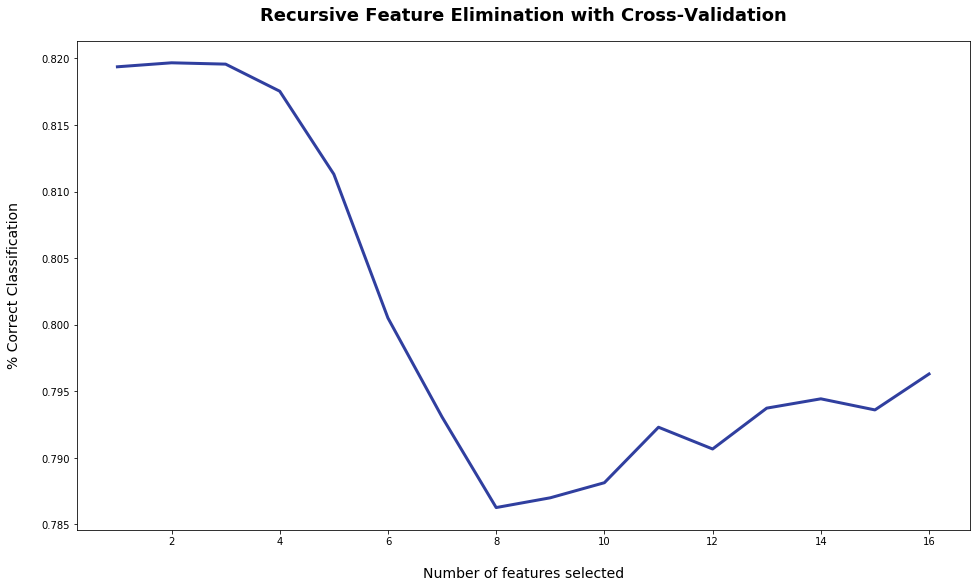

In [18]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [19]:
print(np.where(rfecv.support_ == False)[0])

[ 0  1  2  3  4  7  8  9 10 11 12 13 14 15]


In [20]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

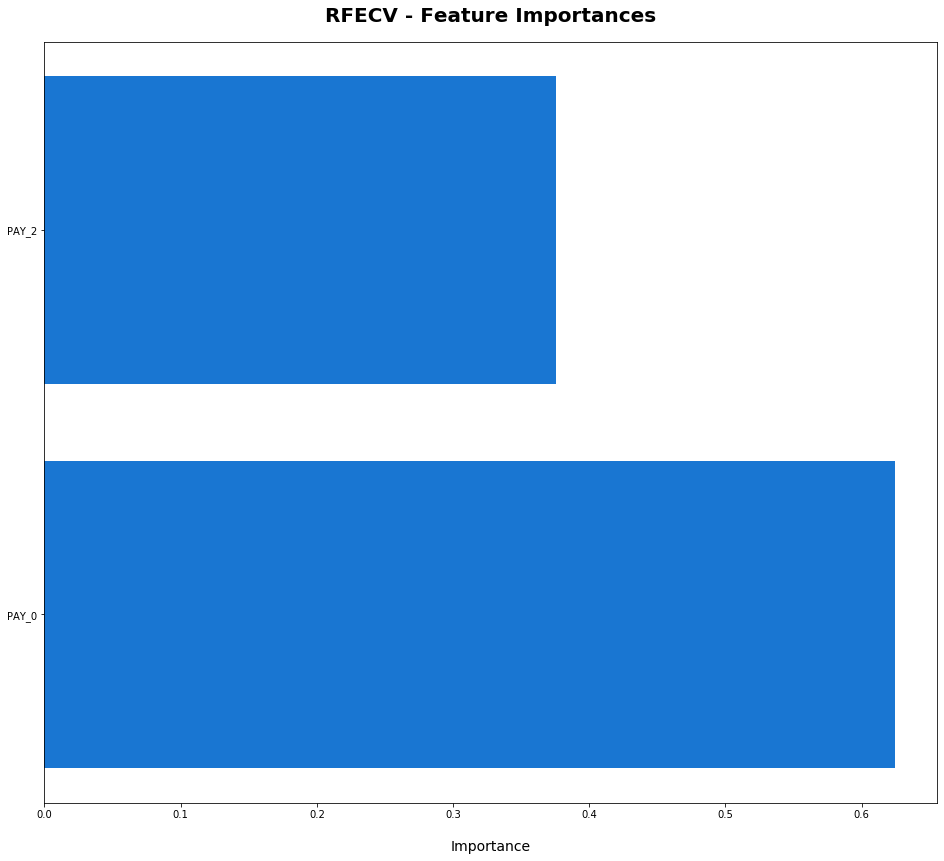

In [21]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [22]:
credit.drop(credit.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [23]:
credit

,PAY_0,PAY_2,default payment next month
0,2,2,1
1,-1,2,1
2,0,0,0
3,0,0,0
4,-1,0,0
...,...,...,...
29995,0,0,0
29996,-1,-1,0
29997,4,3,1
29998,1,-1,1


In [24]:
X

,PAY_0,PAY_2
0,2,2
1,-1,2
2,0,0
3,0,0
4,-1,0
...,...,...
29995,0,0
29996,-1,-1
29997,4,3
29998,1,-1


In [25]:
Y = target

In [26]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [28]:
X_train.shape, Y_train.shape

((21000, 2), (21000,))

In [29]:
X_test.shape, Y_test.shape

((9000, 2), (9000,))

In [30]:
#Models
modelSVC = SVC()
modelRF = RandomForestClassifier()
#modelLR = LogisticRegression()
#modelLDA = LinearDiscriminantAnalysis()
modelKNN = KNeighborsClassifier()
#modelDT = DecisionTreeClassifier()
modelGB = GradientBoostingClassifier()

In [31]:
#Random Forest grid
gridRF = {'n_estimators':range(1,20), 
          'criterion':['gini','entropy'], 
          'min_samples_split':range(2,12),
          'min_samples_leaf':range(1,6)}
print('Number of tested Random Forest models: %i' 
      % np.prod([len(gridRF[element]) for element in gridRF]))
score_metricRF = 'accuracy'

Number of tested Random Forest models: 1900


In [32]:
#Random Forest fit
searchRF = GridSearchCV(estimator=modelRF,
                       param_grid=gridRF,
                       scoring=score_metricRF,
                       n_jobs=-1,
                       refit=True,
                       return_train_score=True,
                       cv=10)
searchRF.fit(X_train,Y_train)
print('Best parameters: %s' % searchRF.best_params_)
print('CV Accuracy of best parameters: %.3f' %
     searchRF.best_score_)
#print(cross_val_score(modelRF, X_train, Y_train))
#modelRF.score(X_train,Y_train)

Best parameters: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 3}
CV Accuracy of best parameters: 0.821


In [33]:
#Support Vector Machine grid
gridSVC = {'C': [0.1, 1, 10, 100, 1000],  
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['rbf']}
print('Number of tested Support Vector Machine models: %i' 
      % np.prod([len(gridSVC[element]) for element in gridSVC]))
score_metricSVC = 'accuracy'

Number of tested Support Vector Machine models: 25


In [34]:
#Support Vector fit 
searchSVC = GridSearchCV(estimator=modelSVC,
                       param_grid=gridSVC,
                       scoring=score_metricSVC,
                       n_jobs=-1,
                       refit=True,
                       return_train_score=True,
                       cv=10)
searchSVC.fit(X_train,Y_train)
print('Best parameters: %s' % searchSVC.best_params_)
print('CV Accuracy of best parameters: %.3f' %
     searchSVC.best_score_)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
CV Accuracy of best parameters: 0.820


In [123]:
#Logistic Regression
#modelLR.fit(X_train,Y_train)
#print(cross_val_score(modelLR, X_train, Y_train))
#modelLR.score(X_train,Y_train)

In [124]:
#Linear Discriminant Analysis
#modelLDA.fit(X_train,Y_train)
#print(cross_val_score(modelLDA, X_train, Y_train))
#modelLDA.score(X_train,Y_train)

In [35]:
#K Nearest neighbor grid
gridKNN = {'n_neighbors':range(1,11), 
          'weights':['uniform','distance'], 
          'p':[1,2]}
print('Number of tested K Nearest neighbor models: %i' 
      % np.prod([len(gridKNN[element]) for element in gridKNN]))
score_metricKNN = 'accuracy'

Number of tested K Nearest neighbor models: 40


In [36]:
#K Nearest neighbor fit
searchKNN = GridSearchCV(estimator=modelKNN,
                       param_grid=gridKNN,
                       scoring=score_metricKNN,
                       n_jobs=-1,
                       refit=True,
                       return_train_score=True,
                       cv=10)
searchKNN.fit(X_train,Y_train)
print('Best parameters: %s' % searchKNN.best_params_)
print('CV Accuracy of best parameters: %.3f' %
     searchKNN.best_score_)


Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
CV Accuracy of best parameters: 0.809


In [127]:
#Decision Tree
#modelDT.fit(X_train,Y_train)
#print(cross_val_score(modelDT, X_train, Y_train))
#modelDT.score(X_train,Y_train)

In [37]:
#Gradient Boosted grid
gridGB = {'learning_rate':[0.1,0.01], 
          'n_estimators':[50,100], 
          'max_depth':[2,3,4],
          'min_samples_split':[2,4],
          'min_samples_leaf':[1,3],
          'subsample':[1]}
print('Number of tested Gradient Boosted  models: %i' 
      % np.prod([len(gridGB[element]) for element in gridGB]))
score_metricGB = 'accuracy'

Number of tested Gradient Boosted  models: 48


In [38]:
#Gradient Boosted fit 
searchGB = GridSearchCV(estimator=modelGB,
                       param_grid=gridGB,
                       scoring=score_metricGB,
                       n_jobs=-1,
                       refit=True,
                       return_train_score=True,
                       cv=10)
searchGB.fit(X_train,Y_train)
print('Best parameters: %s' % searchGB.best_params_)
print('CV Accuracy of best parameters: %.3f' %
     searchGB.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1}
CV Accuracy of best parameters: 0.821


In [39]:
#Make Predictions with Randon Forest
Y_predRF = searchRF.predict(X_test)
Acc_RF = accuracy_score(Y_test, Y_predRF)
Kp_RF = cohen_kappa_score(Y_test, Y_predRF)
print('Accuracy of the Random Forest Classifier is: %.3f' % Acc_RF)
print('Kappa Score of the Random Forest Classifier is: %.3f' % Kp_RF)

Accuracy of the Random Forest Classifier is: 0.819
Kappa Score of the Random Forest Classifier is: 0.364


In [40]:
#Make Predictions with Support Vector Machine
Y_predSVC = searchSVC.predict(X_test)
Acc_SVC = accuracy_score(Y_test, Y_predSVC)
Kp_SVC = cohen_kappa_score(Y_test, Y_predSVC)
print('Accuracy of the Support Vector Machine Classifier is: %.3f' % Acc_SVC)
print('Kappa Score of the Support Vector Machine Classifier is: %.3f' % Kp_SVC)

Accuracy of the Support Vector Machine Classifier is: 0.820
Kappa Score of the Support Vector Machine Classifier is: 0.362


In [41]:
#Make Predictions with K Nearest neighbor:
Y_predKNN = searchKNN.predict(X_test)
Acc_KNN = accuracy_score(Y_test, Y_predKNN)
Kp_KNN = cohen_kappa_score(Y_test, Y_predKNN)
print('Accuracy of the K Nearest neighbor is: %.3f' % Acc_KNN)
print('Kappa Score of the K Nearest neighbor Classifier is: %.3f' % Kp_KNN)

Accuracy of the K Nearest neighbor is: 0.818
Kappa Score of the K Nearest neighbor Classifier is: 0.363


In [42]:
#Make Predictions with Gradient Boosted:
Y_predGB = searchGB.predict(X_test)
Acc_GB = accuracy_score(Y_test, Y_predGB)
Kp_GB = cohen_kappa_score(Y_test, Y_predGB)
print('Accuracy of the Gradient Boosted is: %.3f' % Acc_GB)
print('Kappa Score of the Gradient Boosted Classifier is: %.3f' % Kp_GB)

Accuracy of the Gradient Boosted is: 0.819
Kappa Score of the Gradient Boosted Classifier is: 0.365


In [44]:
# Confusion matrix with SVM
CM_SVC = confusion_matrix(Y_test, Y_predSVC)

In [48]:
CM_SVC
print (classification_report(Y_test, Y_predSVC)) 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6967
           1       0.72      0.33      0.45      2033

    accuracy                           0.82      9000
   macro avg       0.78      0.65      0.67      9000
weighted avg       0.81      0.82      0.79      9000

